### Bootstrapping

In [15]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

from matplotlib import pyplot as plt 
%config InlineBackend.figure_format = "retina"

In [16]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [17]:
telecom_data = pd.read_csv(DATA_PATH+"telecom_churn.csv")

In [18]:
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
telecom_data.shape

(3333, 20)

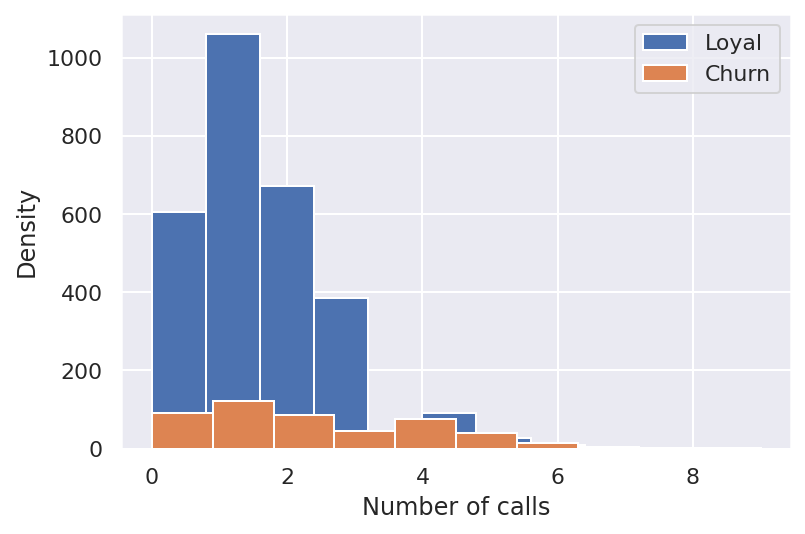

In [20]:
telecom_data.loc[telecom_data["Churn"]==False, "Customer service calls"].hist(label = "Loyal")
telecom_data.loc[telecom_data["Churn"]==True, "Customer service calls"].hist(label = "Churn")


plt.xlabel("Number of calls")
plt.ylabel("Density")
plt.legend()

 Let’s generate 1000 new bootstrap samples from our original population and produce an interval estimate of the mean.

In [26]:
def get_bootstarp_samples(data,n_samples):
    """Generate bootstrap samples using the bootsrap method"""

    # indices shape (1000,2850/483)
    # each row contains a sample
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    # shape of data was (2835,)...
    # automatically interpreted as (1,2850)
    # then broadcasted to (1000,2850) to match the shape of indices
    samples = data[indices]
    return samples

# produce confidence interval of the mean
def stat_intervals(stat,alpha):
    """Produce an interval estimate"""
    boundaries = np.percentile(stat,[100*alpha/2.0, 100*(1-alpha / 2.0)])
    return boundaries




# save the data about the loyal and former customers to split the dataset
# (2850,)
loyal_calls = telecom_data.loc[
    telecom_data["Churn"] == False, "Customer service calls"
].values 
# (483,)
churn_calls = telecom_data.loc[
    telecom_data["Churn"] == True, "Customer service calls"
].values

# setting random seed
np.random.seed(0)

# Generate the samples using bootstrapping and calculate the mean for each of them

# the size of sample should be (2850,)
loyal_mean_scores = [ 
    np.mean(sample) for sample in get_bootstarp_samples(loyal_calls,1000)
]
churn_mean_scores = [
    np.mean(sample) for sample in get_bootstarp_samples(churn_calls,1000)
]

print(
    "Service calls from loyal: mean interval", stat_intervals(loyal_mean_scores,0.05)
)
print(
    "Service calls from churn: mean interval", stat_intervals(churn_mean_scores,0.05)
)



Service calls from loyal: mean interval [1.4077193  1.49473684]
Service calls from churn: mean interval [2.0621118  2.39761905]
